In [67]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import numpy as np
from IPython.display import display
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
%matplotlib inline
import os

In [2]:
csv = '/Users/nonoumasy/Dropbox/reference/data/Los_Angeles_Collisions_2013through2018.csv'
df = pd.read_csv(csv)
pd.options.display.max_columns = None

#bicycle accidents dataset
df_bike = df[df['bicycle_accident'] == 'Y']

#atwater dataset
atwater = df[(df.point_x <= -118.24) & (df.point_x >= -118.27) & (df.point_y >= 34.10) & (df.point_y <= 34.15) & (df.bicycle_accident == 'Y')]  #multi-filter columns",


In [9]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'case_id', 'accident_year', 'proc_date', 'juris',
       'collision_date', 'collision_time', 'officer_id', 'reporting_district',
       'day_of_week', 'chp_shift', 'population', 'cnty_city_loc',
       'special_cond', 'beat_type', 'chp_beat_type', 'city_division_lapd',
       'chp_beat_class', 'beat_number', 'primary_rd', 'secondary_rd',
       'distance', 'direction', 'intersection', 'weather_1', 'weather_2',
       'state_hwy_ind', 'caltrans_county', 'caltrans_district', 'state_route',
       'route_suffix', 'postmile_prefix', 'postmile', 'location_type',
       'ramp_intersection', 'side_of_hwy', 'tow_away', 'collision_severity',
       'number_killed', 'number_injured', 'party_count', 'primary_coll_factor',
       'pcf_code_of_viol', 'pcf_viol_category', 'pcf_violation',
       'pcf_viol_subsection', 'hit_and_run', 'type_of_collision', 'mviw',
       'ped_action', 'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'chp_ro

In [164]:
# number of bycyclist fatalities
print("Total Bicyclist Fatalities in Los Angeles from 2013-12018 is: " + str(len(df[df['count_bicyclist_killed'] == 1])))
print()
# number of bycyclist injuries(non-fatal)
print("Total Bicyclist Fatalities in Los Angeles from 2013-12018 is: " + str(len(df[df['count_bicyclist_injured'] == 1])))
print()
# Bicycle accidents by year
print("Yearly Bicyclist Accidents in Los Angeles from 2013-12018 is: ")
print(df_bike.accident_year.value_counts().sort_index(ascending=True))
print()
# Bicycle accidents by month
print("Monthly Bicyclist Accidents in Los Angeles from 2013-12018 is: ")
print(df_bike.month_.value_counts().sort_index(ascending=True))
print()

# Top 10 roads with the most bicycle accidents
print('Top 10 roads with the most bicycle accidents in Los Angeles 2013-2018')
df_bike.m_primaryrd.value_counts().head(10)

Total Bicyclist Fatalities in Los Angeles from 2013-12018 is: 78

Total Bicyclist Fatalities in Los Angeles from 2013-12018 is: 10863

Yearly Bicyclist Accidents in Los Angeles from 2013-12018 is: 
2013    2414
2014    2310
2015    2161
2016    2002
2017    1984
2018     768
Name: accident_year, dtype: int64

Monthly Bicyclist Accidents in Los Angeles from 2013-12018 is: 
1      900
2      987
3     1092
4     1100
5     1103
6      971
7      974
8      986
9      952
10     991
11     872
12     711
Name: month_, dtype: int64

Top 10 roads with the most bicycle accidents in Los Angeles 2013-2018


VERMONT AVE        282
FIGUEROA ST        251
VENICE BLVD        225
SUNSET BLVD        197
PICO BLVD          182
WESTERN AVE        181
OLYMPIC BLVD       154
7TH ST             149
WASHINGTON BLVD    140
WILSHIRE BLVD      137
Name: m_primaryrd, dtype: int64

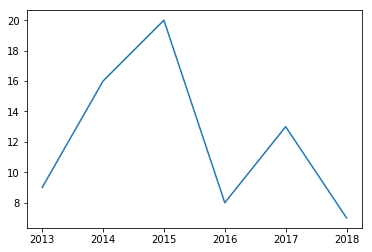

In [166]:
atwater.accident_year.value_counts().sort_index(ascending=True).plot()

In [128]:
m=folium.Map(location=[atwater.point_y.mean(), atwater.point_x.mean()], 
             zoom_start=15, 
             tiles='stamentoner', 
             no_wrap=True,)

mc = folium.plugins.MarkerCluster().add_to(m)

'''
heat_df = df_bike[['point_y', 'point_x']]
heat_data = [[row['point_y'],row['point_x']] for index, row in heat_df.iterrows()]

plugins.HeatMap(heat_data).add_to(m)
'''

# Map of Bicycle Accident in/or around Atwater Village
for lon,lat, addr in zip(atwater.point_y, atwater.point_x, atwater.match_addr ):
    folium.CircleMarker(location=[lon, lat],
                       fill_color='red',
                       popup = str(addr)).add_to(mc)


folium.plugins.Fullscreen().add_to(m)
m.save('/Users/nonoumasy/Desktop/temp.html')
m

#os.system('python send_sms.py')


In [125]:
atwater

,X,Y,OBJECTID,case_id,accident_year,proc_date,juris,collision_date,collision_time,officer_id,reporting_district,day_of_week,chp_shift,population,cnty_city_loc,special_cond,beat_type,chp_beat_type,city_division_lapd,chp_beat_class,beat_number,primary_rd,secondary_rd,distance,direction,intersection,weather_1,weather_2,state_hwy_ind,caltrans_county,caltrans_district,state_route,route_suffix,postmile_prefix,postmile,location_type,ramp_intersection,side_of_hwy,tow_away,collision_severity,number_killed,number_injured,party_count,primary_coll_factor,pcf_code_of_viol,pcf_viol_category,pcf_violation,pcf_viol_subsection,hit_and_run,type_of_collision,mviw,ped_action,road_surface,road_cond_1,road_cond_2,lighting,control_device,chp_road_type,pedestrian_accident,bicycle_accident,motorcycle_accident,truck_accident,not_private_property,alcohol_involved,stwd_vehtype_at_fault,chp_vehtype_at_fault,count_severe_inj,count_visible_inj,count_complaint_pain,count_ped_killed,count_ped_injured,count_bicyclist_killed,count_bicyclist_injured,count_mc_killed,count_mc_injured,primary_ramp,secondary_ramp,latitude,longitude,timecat,month_,city,county,state,point_x,point_y,match_addr,m_primaryrd,m_secondrd,int_id
5488,-118.252189,34.111065,8489,7117208.0,2015,2015-11-20T00:00:00.000Z,1942,2015-10-10T00:00:00.000Z,1345,32108.0,1133.0,6,5.0,7.0,1942,0.0,0.0,0.0,K,0.0,11A37,LARGA AVENUE,GLENHURST AVENUE,10,S,Y,A,-,N,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N,4,0,1,2,-,-,18.0,NaN,NaN,F,D,G,A,A,H,-,A,D,0.0,NaN,Y,NaN,NaN,NaN,NaN,-,NaN,0,0,0,0,0,0,1,0,0,-,-,1862900.84,6485341.80,1500,10,LOS ANGELES,LOS ANGELES,CA,-118.252189,34.111065,"LARGA AVE & GLENHURST AVE, LOS ANGELES, CA",LARGA AVE,GLENHURST AVE,132085.0
7436,-118.266896,34.112092,4437,8494406.0,2017,2017-12-04T00:00:00.000Z,1942,2017-10-04T00:00:00.000Z,755,32996.0,1132.0,3,5.0,7.0,1942,0.0,0.0,0.0,K,0.0,11A1,RIVERSIDE DR,RT 5 S/B ON,0,-,Y,A,-,Y,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,N,4,0,1,2,A,-,9.0,21801.0,A,N,D,G,A,A,H,-,A,D,0.0,NaN,Y,NaN,NaN,Y,NaN,A,1.0,0,0,1,0,0,0,1,0,0,-,-,0.00,0.00,900,10,LOS ANGELES,LOS ANGELES,CA,-118.266896,34.112092,"RIVERSIDE DR & RT 5 S/B ON, LOS ANGELES, CA",RIVERSIDE DR,RT 5 S/B ON,127033.0
10855,-118.241262,34.118065,5856,8505077.0,2017,2017-11-30T00:00:00.000Z,1942,2017-10-24T00:00:00.000Z,640,39010.0,1124.0,2,5.0,7.0,1942,0.0,0.0,0.0,K,0.0,11A89,FLETCHER DR,ESTARA AV,0,NaN,Y,A,-,N,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,N,3,0,1,2,A,-,9.0,21801.0,A,N,A,G,A,A,H,-,A,A,0.0,NaN,Y,NaN,NaN,Y,NaN,A,1.0,0,1,0,0,0,0,1,0,0,-,-,0.00,0.00,900,10,LOS ANGELES,LOS ANGELES,CA,-118.241262,34.118065,"FLETCHER DR & ESTARA AVE, LOS ANGELES, CA",FLETCHER DR,ESTARA AVE,121561.0
17561,-118.263248,34.115959,20562,7118955.0,2015,2015-12-01T00:00:00.000Z,1942,2015-11-11T00:00:00.000Z,733,39761.0,1123.0,3,5.0,7.0,1942,0.0,0.0,0.0,K,0.0,11TL21,GLENDALE BOULEVARD,GLENFELIZ BOULEVARD,101,S,N,A,-,N,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N,3,0,1,2,A,-,9.0,21804.0,A,N,D,G,A,A,H,-,A,D,0.0,NaN,Y,NaN,NaN,NaN,NaN,A,1.0,0,1,0,0,0,0,1,0,0,-,-,1864676.32,6481981.66,900,11,LOS ANGELES,LOS ANGELES,CA,-118.263248,34.115959,"GLENDALE BLVD & GLENFELIZ BLVD, LOS ANGELES, CA",GLENDALE BLVD,GLENFELIZ BLVD,146176.0
20442,-118.249872,34.111694,21443,8514383.0,2017,2017-12-19T00:00:00.000Z,1942,2017-11-14T00:00:00.000Z,815,33395.0,1133.0,2,5.0,7.0,1942,0.0,0.0,0.0,K,0.0,11A71,FLETCHER DR,PERLITA AV,0,NaN,Y,A,-,N,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,N,4,0,1,2,A,-,8.0,22100.0,B,N,B,G,A,A,H,-,A,D,0.0,NaN,Y,NaN,NaN,Y,NaN,L,4.0,0,0,1,0,0,0,1,0,0,-,-,0.00,0.00,900,11,LOS ANGELES,LOS ANGELES,CA,-118.249872,34.111694,"FLETCHER DR & PERLITA AVE, LOS ANGELES, CA",FLETCHER DR,PERLITA AVE,132017.0
20869,-118.260653,34.118324,21870,7118954.0,2015,2015-12-01T00:00:00.000Z,1942,2015-11-12T00:00:00.000Z,1140,31152.0,1133.0,4,5.0,7.0,1942,0.0,0.0,0.0,K,0.0,11TL25,GLENDALE BOULEVARD,LARGA AVENUE (N),10,S,Y,A,-,N,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N,3,0,1,2,A,-,3.0,22350.0,NaN,N,D,G,A,A,H,-,A,D,0.0,NaN,Y,NaN,NaN,NaN,NaN,L,4.0,0,1,0,0,0,0,1,0,0,-,-,1865558.4

In [129]:
atwater

,X,Y,OBJECTID,case_id,accident_year,proc_date,juris,collision_date,collision_time,officer_id,reporting_district,day_of_week,chp_shift,population,cnty_city_loc,special_cond,beat_type,chp_beat_type,city_division_lapd,chp_beat_class,beat_number,primary_rd,secondary_rd,distance,direction,intersection,weather_1,weather_2,state_hwy_ind,caltrans_county,caltrans_district,state_route,route_suffix,postmile_prefix,postmile,location_type,ramp_intersection,side_of_hwy,tow_away,collision_severity,number_killed,number_injured,party_count,primary_coll_factor,pcf_code_of_viol,pcf_viol_category,pcf_violation,pcf_viol_subsection,hit_and_run,type_of_collision,mviw,ped_action,road_surface,road_cond_1,road_cond_2,lighting,control_device,chp_road_type,pedestrian_accident,bicycle_accident,motorcycle_accident,truck_accident,not_private_property,alcohol_involved,stwd_vehtype_at_fault,chp_vehtype_at_fault,count_severe_inj,count_visible_inj,count_complaint_pain,count_ped_killed,count_ped_injured,count_bicyclist_killed,count_bicyclist_injured,count_mc_killed,count_mc_injured,primary_ramp,secondary_ramp,latitude,longitude,timecat,month_,city,county,state,point_x,point_y,match_addr,m_primaryrd,m_secondrd,int_id
5488,-118.252189,34.111065,8489,7117208.0,2015,2015-11-20T00:00:00.000Z,1942,2015-10-10T00:00:00.000Z,1345,32108.0,1133.0,6,5.0,7.0,1942,0.0,0.0,0.0,K,0.0,11A37,LARGA AVENUE,GLENHURST AVENUE,10,S,Y,A,-,N,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N,4,0,1,2,-,-,18.0,NaN,NaN,F,D,G,A,A,H,-,A,D,0.0,NaN,Y,NaN,NaN,NaN,NaN,-,NaN,0,0,0,0,0,0,1,0,0,-,-,1862900.84,6485341.80,1500,10,LOS ANGELES,LOS ANGELES,CA,-118.252189,34.111065,"LARGA AVE & GLENHURST AVE, LOS ANGELES, CA",LARGA AVE,GLENHURST AVE,132085.0
7436,-118.266896,34.112092,4437,8494406.0,2017,2017-12-04T00:00:00.000Z,1942,2017-10-04T00:00:00.000Z,755,32996.0,1132.0,3,5.0,7.0,1942,0.0,0.0,0.0,K,0.0,11A1,RIVERSIDE DR,RT 5 S/B ON,0,-,Y,A,-,Y,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,N,4,0,1,2,A,-,9.0,21801.0,A,N,D,G,A,A,H,-,A,D,0.0,NaN,Y,NaN,NaN,Y,NaN,A,1.0,0,0,1,0,0,0,1,0,0,-,-,0.00,0.00,900,10,LOS ANGELES,LOS ANGELES,CA,-118.266896,34.112092,"RIVERSIDE DR & RT 5 S/B ON, LOS ANGELES, CA",RIVERSIDE DR,RT 5 S/B ON,127033.0
10855,-118.241262,34.118065,5856,8505077.0,2017,2017-11-30T00:00:00.000Z,1942,2017-10-24T00:00:00.000Z,640,39010.0,1124.0,2,5.0,7.0,1942,0.0,0.0,0.0,K,0.0,11A89,FLETCHER DR,ESTARA AV,0,NaN,Y,A,-,N,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,N,3,0,1,2,A,-,9.0,21801.0,A,N,A,G,A,A,H,-,A,A,0.0,NaN,Y,NaN,NaN,Y,NaN,A,1.0,0,1,0,0,0,0,1,0,0,-,-,0.00,0.00,900,10,LOS ANGELES,LOS ANGELES,CA,-118.241262,34.118065,"FLETCHER DR & ESTARA AVE, LOS ANGELES, CA",FLETCHER DR,ESTARA AVE,121561.0
17561,-118.263248,34.115959,20562,7118955.0,2015,2015-12-01T00:00:00.000Z,1942,2015-11-11T00:00:00.000Z,733,39761.0,1123.0,3,5.0,7.0,1942,0.0,0.0,0.0,K,0.0,11TL21,GLENDALE BOULEVARD,GLENFELIZ BOULEVARD,101,S,N,A,-,N,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N,3,0,1,2,A,-,9.0,21804.0,A,N,D,G,A,A,H,-,A,D,0.0,NaN,Y,NaN,NaN,NaN,NaN,A,1.0,0,1,0,0,0,0,1,0,0,-,-,1864676.32,6481981.66,900,11,LOS ANGELES,LOS ANGELES,CA,-118.263248,34.115959,"GLENDALE BLVD & GLENFELIZ BLVD, LOS ANGELES, CA",GLENDALE BLVD,GLENFELIZ BLVD,146176.0
20442,-118.249872,34.111694,21443,8514383.0,2017,2017-12-19T00:00:00.000Z,1942,2017-11-14T00:00:00.000Z,815,33395.0,1133.0,2,5.0,7.0,1942,0.0,0.0,0.0,K,0.0,11A71,FLETCHER DR,PERLITA AV,0,NaN,Y,A,-,N,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,N,4,0,1,2,A,-,8.0,22100.0,B,N,B,G,A,A,H,-,A,D,0.0,NaN,Y,NaN,NaN,Y,NaN,L,4.0,0,0,1,0,0,0,1,0,0,-,-,0.00,0.00,900,11,LOS ANGELES,LOS ANGELES,CA,-118.249872,34.111694,"FLETCHER DR & PERLITA AVE, LOS ANGELES, CA",FLETCHER DR,PERLITA AVE,132017.0
20869,-118.260653,34.118324,21870,7118954.0,2015,2015-12-01T00:00:00.000Z,1942,2015-11-12T00:00:00.000Z,1140,31152.0,1133.0,4,5.0,7.0,1942,0.0,0.0,0.0,K,0.0,11TL25,GLENDALE BOULEVARD,LARGA AVENUE (N),10,S,Y,A,-,N,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N,3,0,1,2,A,-,3.0,22350.0,NaN,N,D,G,A,A,H,-,A,D,0.0,NaN,Y,NaN,NaN,NaN,NaN,L,4.0,0,1,0,0,0,0,1,0,0,-,-,1865558.4